# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [5]:
df1 = df[df["dt"] > "1900-01-01"]

In [6]:
df["year"] = pd.DatetimeIndex(df['dt']).year

In [7]:
new_df = df[np.logical_and(df["dt"] >= "1900-01-01",
                           df["dt"] < "2013-01-01")]

In [8]:
def nans(year, df=new_df):
    subset = df[df["dt"] >= str(year) + "-01-01"]
    return subset.isna().sum().max() / len(subset) * 100

In [9]:
def nans_2(year, df=new_df):
    subset = df[np.logical_and(df["dt"] >= str(year) + "-01-01", 
                               df["dt"] < str(year+1) +"-01-01")]
    return subset.isna().sum().max() / len(subset) * 100 

In [85]:
e1 = np.vectorize(nans)(sorted(new_df["year"].unique()))
e2 = np.vectorize(nans_2)(sorted(new_df["year"].unique()))

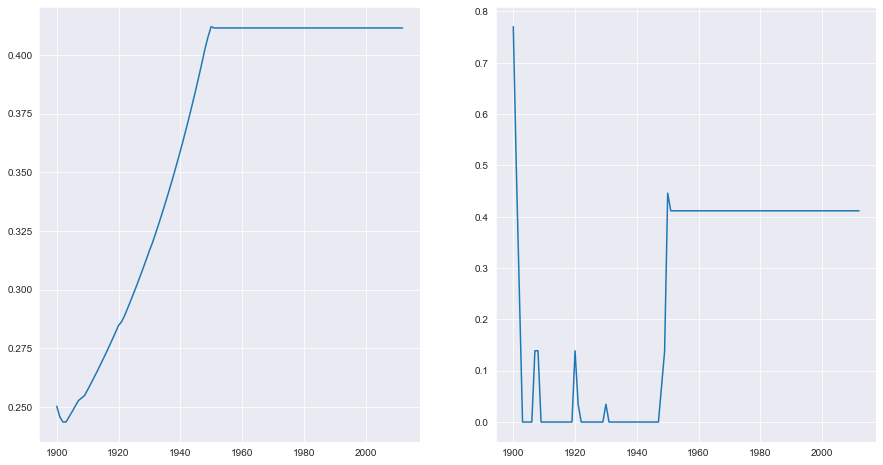

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(new_df["year"].unique(), e1)
ax[1].plot(new_df["year"].unique(), e2)
plt.show()

In [106]:
nany = new_df[new_df.isna().any(axis=1)]

In [158]:
nany["Country"].unique()

array(['Antarctica', 'Federated States Of Micronesia', 'French Polynesia',
       'French Southern And Antarctic Lands',
       'Heard Island And Mcdonald Islands', 'Palau',
       'South Georgia And The South Sandwich Isla'], dtype=object)

In [111]:
ttttt = new_df[new_df["dt"] > "1960-01-01"]

In [112]:
nany_ttttt = ttttt[ttttt.isna().any(axis=1)]

In [113]:
nany_ttttt["Country"].unique()

array(['Antarctica'], dtype=object)

In [120]:
def count_country(year):
    return len(new_df[new_df["year"] == year]["Country"].unique())

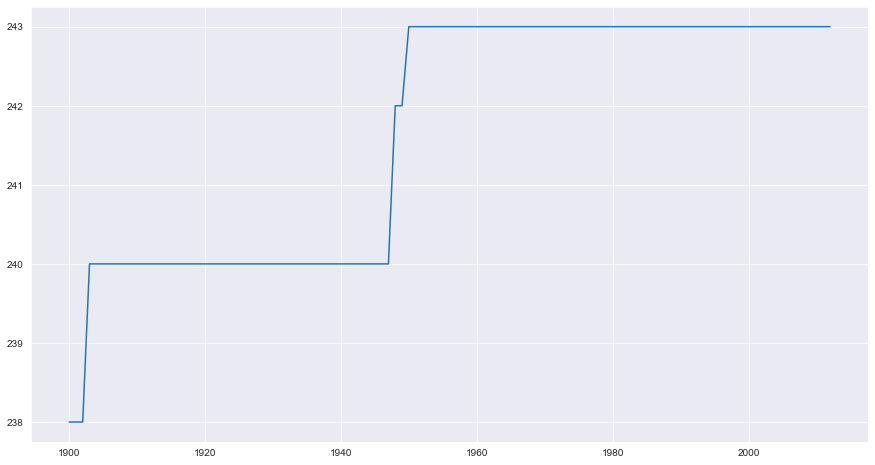

In [122]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(new_df['year'].unique(), np.vectorize(count_country)(new_df['year'].unique()))
plt.show()

In [123]:
def func(year):
    return set(new_df[new_df["year"] == year]["Country"])

In [125]:
sety = [func(i) for i in new_df["year"].unique()]

In [128]:
sety[-1] - sety[0]

{'Antarctica',
 'French Southern And Antarctic Lands',
 'Guam',
 'Heard Island And Mcdonald Islands',
 'Northern Mariana Islands'}

In [ ]:
for i in new_df["Country"].unique():
    subset = new_df[new_df["Country"] == i]
    

In [144]:
new_df[new_df["dt"] == max(new_df["dt"])].isna().sum()

dt                               0
AverageTemperature               1
AverageTemperatureUncertainty    0
Country                          0
year                             0
dtype: int64

In [145]:
w = new_df[new_df["dt"] == max(new_df["dt"])]

In [146]:
w[w.isna().any(axis=1)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
23179,2012-12-01,NaN,0.604,Antarctica,2012


In [148]:
z = new_df[new_df["Country"] == "Antarctica"]

In [149]:
z[z.isna().any(axis=1)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
22425,1950-02-01,NaN,2.107,Antarctica,1950
22426,1950-03-01,NaN,2.168,Antarctica,1950
22427,1950-04-01,NaN,2.197,Antarctica,1950
22428,1950-05-01,NaN,2.249,Antarctica,1950
22429,1950-06-01,NaN,2.504,Antarctica,1950
...,...,...,...,...,...
23175,2012-08-01,NaN,1.034,Antarctica,2012
23176,2012-09-01,NaN,0.685,Antarctica,2012
23177,2012-10-01,NaN,0.983,Antarctica,2012
23178,2012-11-01,NaN,0.505,Antarctica,2012


In [150]:
new_df = new_df[new_df["Country"] != "Antarctica"]

In [168]:
from copy import deepcopy

In [169]:
test = deepcopy(new_df)

In [ ]:
for i in new_df["Country"].unique():
    subset = new_df[new_df["Country"] == i]
    subset = subset.interpolate().fillna(method="bfill")
    new_df[new_df["Country"]==i] = subset 

In [170]:
for i in test["Country"].unique():
    subset = test[new_df["Country"] == i]
    subset = subset.interpolate().fillna(method="bfill")
    test[test["Country"] == i] = subset 

In [171]:
test.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
year                             0
dtype: int64

In [172]:
test.to_csv("final_data.csv", index=False)